Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

Problem 1: Find Minimum of Convex Function


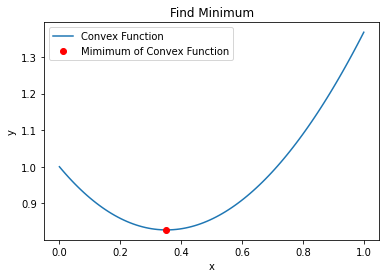

In [2]:
#procedure which determines the minimum of a convex function f in the interval [a, b] using “trisection" of the interval
def trisection(f, left, right, tol):
    while (right - left) > tol:
        middle = (left + right)/2
        lm = (left + middle)/2
        rm = (middle + right)/2
        if f(lm) < f(rm):
            right = rm
        else:
            left = lm
    return (left + right)/2



def f_convex(x):
    alpha = 1
    beta = 2
    return np.exp(-alpha*x)+np.power(x,beta)


a = 0
b = 1

tol = 0.0001
    
minimum = trisection(f_convex,a,b,tol)

x = np.linspace(0,1,100)
y = f_convex(x)
plt.plot(x,y)
plt.plot(minimum,f_convex(minimum),'ro')
plt.title("Find Minimum")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Convex Function","Mimimum of Convex Function"])
plt.show()     

Problem 2: Bresenham Algorithm

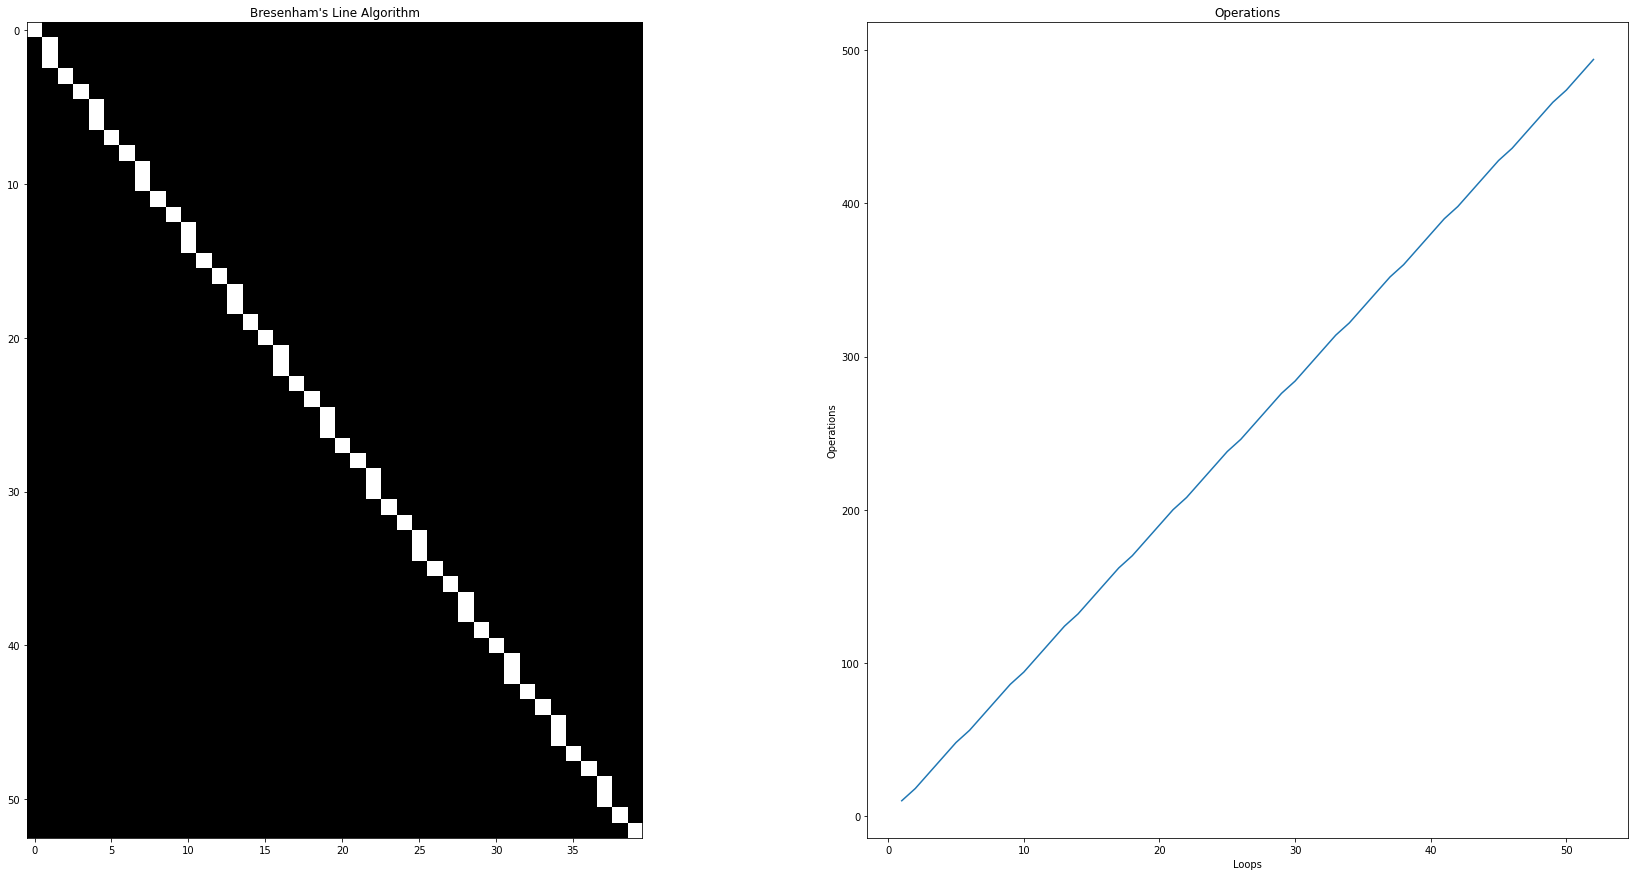

In [3]:
#create blank image
width = 40
aspectratio = 0.75
height = int(width / aspectratio)
x = 0
y = 0
dx = width - x - 1
dy = height - y - 1
img = np.zeros((height,width,1), np.uint8)

errorXdx = 0
errorYdy = 0
img[y,x] = 255
operations = 0
ops = []
loops = []

loopcounter = 0
while x < width-1: 
    operations += 1 #vgl while
    errorXdx = errorXdx + dy
    errorYdy = errorYdy + dx
    operations += 2
    operations += 2 # vgl if
    if errorXdx + errorXdx > dx:
        y = y + 1
        errorXdx = errorXdx - dx
        operations += 2
    operations += 2 # vgl if
    if errorYdy + errorYdy > dy:
        x = x + 1
        errorYdy = errorYdy - dy
        operations += 2
    img[y,x] = 255
    operations += 1
    loopcounter += 1
    ops.append(operations)
    loops.append(loopcounter)


fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Bresenham\'s Line Algorithm')
ax.imshow(img, cmap='gray', vmin = 0, vmax = 255)
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Operations')
ax.set_xlabel('Loops')
ax.set_ylabel('Operations')
ax.plot(loops,ops)


